# Effect of delay intervals of teacher joining the live class on student's attendance in lectures.

#### Dataframe: For a respective lecture; strength of students, students attending the lecture, attendance%, students attending within different delay intervals is calculated. 

#### In the data we have excluded the lectures where the present students is zero. 

#### Delay is the difference between the scheduled time of the lecture and the actual start time of the lecture. The actual start time of the lecture is extracted when the teacher starts the class for the first time. Excluded the cases where teacher starts the class and leaves the class multiple times or in case of power cut or internet issue. The very first time when teacher clicks on start live class is considered here. 

**Attendance is the present students divided by the total strength of students of the lecture.**



In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from fastparquet import write, ParquetFile


In [30]:
# df = pd.read_parquet('C:/Users/Apoorva/OneDrive/Documents/ML_Practice/DataSets-Practice ML/attendanc.parquet', engine='auto')


In [31]:
# df.to_csv('attendance.csv')

In [32]:
df=pd.read_csv('C:/Users/Apoorva/OneDrive/Documents/ML_Practice/DataSets-Practice ML/lec_att.csv')


In [33]:
df

,live_lecture_id,delay_diff_min,strength,present,attendance
0,2394932,0.450000,28,26,92.857143
1,2394945,-1.066667,30,20,66.666667
2,2395969,0.816667,26,14,53.846154
3,2397597,2.150000,27,21,77.777778
4,2397605,3.533333,26,22,84.615385
...,...,...,...,...,...
1174675,4695902,-0.700000,36,17,47.222222
1174676,4696469,-1.066667,36,11,30.555556
1174677,4697938,-0.600000,32,11,34.375000
1174678,4698693,-0.400000,47,3,6.382979


In [34]:
# df['week'] = pd.to_datetime(df['week'])

In [35]:
df['delay_diff_min']=df['delay_diff_min'].astype(int)
df['attendance']=df['attendance'].astype(int)

In [36]:
# df.groupby('week')['delay_diff_min'].mean()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174680 entries, 0 to 1174679
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   live_lecture_id  1174680 non-null  int64
 1   delay_diff_min   1174680 non-null  int32
 2   strength         1174680 non-null  int64
 3   present          1174680 non-null  int64
 4   attendance       1174680 non-null  int32
dtypes: int32(2), int64(3)
memory usage: 35.8 MB


### The dataframe 

In [38]:
df

,live_lecture_id,delay_diff_min,strength,present,attendance
0,2394932,0,28,26,92
1,2394945,-1,30,20,66
2,2395969,0,26,14,53
3,2397597,2,27,21,77
4,2397605,3,26,22,84
...,...,...,...,...,...
1174675,4695902,0,36,17,47
1174676,4696469,-1,36,11,30
1174677,4697938,0,32,11,34
1174678,4698693,0,47,3,6


In [10]:
conditions = [
    (df['delay_diff_min'] <= 0),
    (df['delay_diff_min'] >= 0) & (df['delay_diff_min'] <= 1),
    (df['delay_diff_min'] >= 2) & (df['delay_diff_min'] <= 3),
    (df['delay_diff_min'] >= 4) & (df['delay_diff_min'] <= 5),
    (df['delay_diff_min'] >= 6) & (df['delay_diff_min'] <= 8),
    (df['delay_diff_min'] >= 9) & (df['delay_diff_min'] <= 10),
    (df['delay_diff_min'] >= 11) & (df['delay_diff_min'] <= 12),
    (df['delay_diff_min'] >= 13) & (df['delay_diff_min'] <= 14),
    (df['delay_diff_min'] >= 15) & (df['delay_diff_min'] <= 18),
    (df['delay_diff_min'] >= 19) & (df['delay_diff_min'] <= 20),
    (df['delay_diff_min'] >= 21)
    ]



####  Creating a list of the values we want to assign for each condition


In [11]:
values = ['no_delay', 'delay_0-1min',  'delay_2-3min', 'delay_4-5min', 
          'delay_6-8min', 'delay_9-10min', 'delay_11-12min', 'delay_13-14min', 
          'delay_15-18min', 'delay_19-20min',  'delay_>21min']


#### Creating a new column and using np.select to assign values to it using our lists as arguments


In [12]:

df['delay_Category'] = np.select(conditions, values)

In [13]:
# df['delay_Category']=0

# def conditions(d1, d2, val):
#     for i in range(len(df['delay_diff_min'])):
#         df['delay_Category'][df['delay_diff_min']>=d1 and df['delay_diff_min']<=d2]=val



In [14]:
# df["delay_Category"] = df["delay_diff_min"].apply(lambda x: conditions(d1,d2,val))

In [15]:
df

,live_lecture_id,delay_diff_min,strength,present,attendance,delay_Category
0,2394932,0,28,26,92,no_delay
1,2394945,-1,30,20,66,no_delay
2,2395969,0,26,14,53,no_delay
3,2397597,2,27,21,77,delay_2-3min
4,2397605,3,26,22,84,delay_2-3min
...,...,...,...,...,...,...
1174675,4695902,0,36,17,47,no_delay
1174676,4696469,-1,36,11,30,no_delay
1174677,4697938,0,32,11,34,no_delay
1174678,4698693,0,47,3,6,no_delay


In [16]:
df.groupby('delay_Category').nunique()

,live_lecture_id,delay_diff_min,strength,present,attendance
delay_Category,,,,,
delay_0-1min,206330,1,334,161,100
delay_11-12min,2277,2,158,85,97
delay_13-14min,1227,2,145,72,96
delay_15-18min,1307,4,139,71,97
delay_19-20min,375,2,89,54,87
delay_2-3min,162272,2,324,157,100
delay_4-5min,47003,2,280,134,100
delay_6-8min,19890,3,256,129,100
delay_9-10min,4446,2,191,98,99


### Calculating lectures in each delay Category:

In [21]:
df.groupby('delay_Category')['live_lecture_id'].count()

delay_Category
delay_0-1min      206330
delay_11-12min      2277
delay_13-14min      1227
delay_15-18min      1307
delay_19-20min       375
delay_2-3min      162272
delay_4-5min       47003
delay_6-8min       19890
delay_9-10min       4446
delay_>21min        1021
no_delay          728532
Name: live_lecture_id, dtype: int64

### Plotting attendance for all delay categories. 

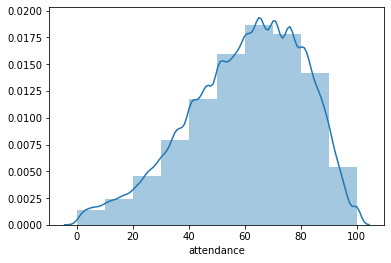

In [17]:
sns.distplot((df[df['delay_Category']=='no_delay']['attendance']), bins=10)

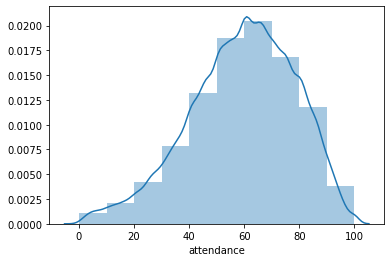

In [18]:
sns.distplot((df[df['delay_Category']=='delay_0-1min']['attendance']), bins=10)

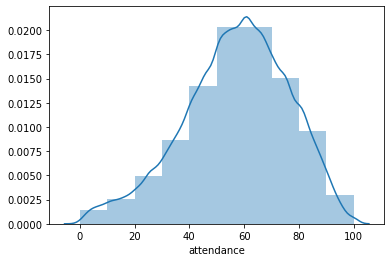

In [19]:
sns.distplot((df[df['delay_Category']=='delay_2-3min']['attendance']), bins=10)

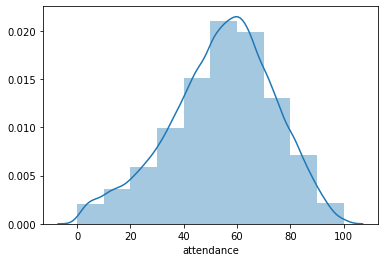

In [20]:
sns.distplot((df[df['delay_Category']=='delay_4-5min']['attendance']), bins=10)

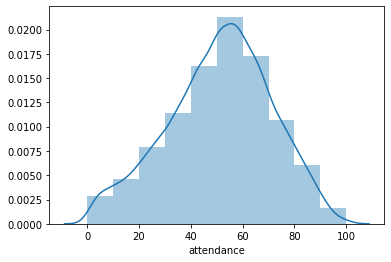

In [21]:
sns.distplot((df[df['delay_Category']=='delay_6-8min']['attendance']), bins=10)

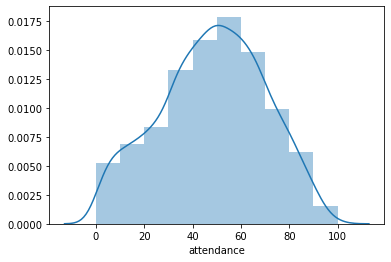

In [22]:
sns.distplot((df[df['delay_Category']=='delay_9-10min']['attendance']), bins=10)

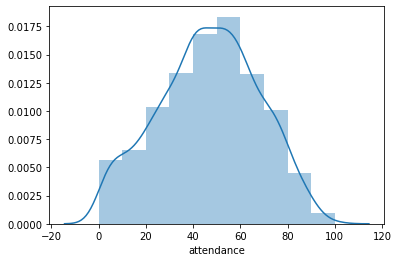

In [23]:
sns.distplot((df[df['delay_Category']=='delay_11-12min']['attendance']), bins=10)

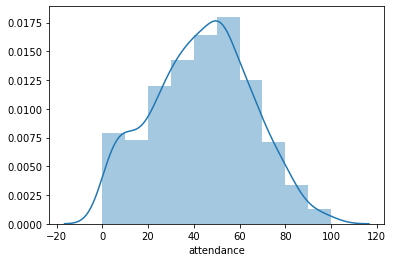

In [24]:
sns.distplot((df[df['delay_Category']=='delay_13-14min']['attendance']), bins=10)

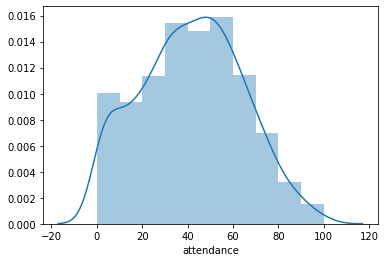

In [25]:
sns.distplot((df[df['delay_Category']=='delay_15-18min']['attendance']), bins=10)


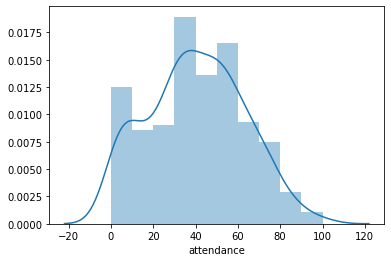

In [26]:
sns.distplot((df[df['delay_Category']=='delay_19-20min']['attendance']), bins=10)



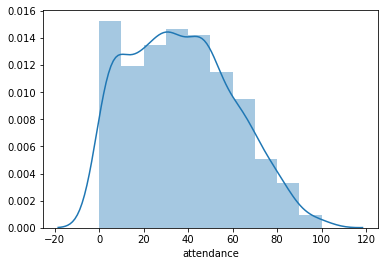

In [27]:
sns.distplot((df[df['delay_Category']=='delay_>21min']['attendance']), bins=10)


### As you can see in the above plots as the delay increases the attendance distribution gets shifted to left as in decreases. 
### The more is the delay of teacher starting the live class, the lesser is attendance in the lectures. 